In [20]:
import numpy as np
import pandas as pd

full_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Project/Data/full-data.csv")
commodity_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Project/Data/realannualcommoditybasedexchangerates_1_.csv")
full_df.head()

,Year,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,...,10 Yr,20 Yr,30 Yr,GDP growth,Commodity_x,Weights_x,Value_x,Commodity_y,Weights_y,Value_y
0,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Bulk,U.S. competitors (country export weights),86.274719
1,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Consumer oriented,U.S. competitors (country export weights),86.054863
2,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Intermediates,U.S. competitors (country export weights),84.863716
3,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Beef and beef products,U.S. competitors (country export weights),84.718597
4,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Competitor agricultural exports to the world,U.S. competitors (country export weights),89.298264


In [4]:
full_df.describe()

,Year,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,GDP growth,Value_x,Value_y
count,186184.000000,114996.000000,21904.000000,175232.000000,0.0,175232.000000,175232.000000,175232.000000,175232.000000,175232.000000,175232.000000,175232.000000,158804.000000,158804.000000,175232.000000,186184.000000,186184.000000
mean,2006.500000,1.225445,1.213289,2.617394,NaN,2.742835,2.864360,3.156177,3.369332,3.759425,4.064632,4.301107,4.449160,4.844607,2.409375,98.254012,98.254012
std,9.810735,1.403988,1.020034,2.264368,NaN,2.302761,2.306045,2.332750,2.287292,2.183836,2.100607,2.001349,1.691543,1.915255,1.834290,11.010497,11.010497
min,1990.000000,0.028200,0.044183,0.032720,NaN,0.063904,0.103984,0.265458,0.382280,0.533068,0.721833,0.889203,1.348207,1.556135,-2.800000,69.732002,69.732002
25%,1998.000000,0.070760,0.281464,0.277250,NaN,0.348897,0.447670,0.801487,1.086604,1.842630,2.153640,2.492210,3.018233,3.111566,1.775000,88.917356,88.917356
50%,2006.500000,0.851000,1.237819,2.038723,NaN,2.127070,2.191442,2.582414,2.939700,3.620840,4.008960,4.280100,4.644160,4.838287,2.700000,98.674572,98.674572
75%,2015.000000,1.843012,2.169643,4.795798,NaN,4.958133,5.060167,5.206466,5.351853,5.701972,5.889821,5.907280,5.715960,6.591520,3.575000,105.686594,105.686594
max,2023.000000,4.752320,2.333333,7.746480,NaN,7.853000,7.887240,8.161600,8.257640,8.373280,8.518840,8.552400,7.490080,8.610000,5.900000,165.372406,165.372406


In [5]:
duplicate_rows = full_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [41]:
#Data Preprocessing

print(len(full_df))

#Dropping column with more than 70% null values
#full_df.drop(columns=['2 Mo', '4 Mo'], inplace=True)

#Dropping rows with multiple null values
full_df.dropna(subset=['3 Mo', '6 Mo', '1 Yr', '2 Yr'], inplace=True)

full_df.dropna(subset=['20 Yr', '30 Yr'], inplace=True)

#Imputation for filling missing values
full_df['3 Mo'].fillna(method='ffill', inplace=True)
full_df['1 Mo'] = full_df['1 Mo'].fillna(method='ffill')
full_df['GDP growth'].fillna(full_df['GDP growth'].mean(), inplace=True)

print(full_df.isnull().sum())


142376
Year                0
1 Mo           142376
3 Mo                0
6 Mo                0
1 Yr                0
2 Yr                0
3 Yr                0
5 Yr                0
7 Yr                0
10 Yr               0
20 Yr               0
30 Yr               0
GDP growth          0
Commodity_x         0
Weights_x           0
Value_x             0
Commodity_y         0
Weights_y           0
Value_y             0
dtype: int64


In [42]:
full_df.head()

,Year,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,GDP growth,Commodity_x,Weights_x,Value_x,Commodity_y,Weights_y,Value_y
16428,1993,None,3.066,3.21912,3.43444,4.0458,4.4396,5.14204,5.53872,5.86628,6.285968,6.59152,2.8,Bulk,U.S. competitors (country export weights),91.273994,Bulk,U.S. competitors (country export weights),91.273994
16429,1993,None,3.066,3.21912,3.43444,4.0458,4.4396,5.14204,5.53872,5.86628,6.285968,6.59152,2.8,Bulk,U.S. competitors (country export weights),91.273994,Consumer oriented,U.S. competitors (country export weights),90.856575
16430,1993,None,3.066,3.21912,3.43444,4.0458,4.4396,5.14204,5.53872,5.86628,6.285968,6.59152,2.8,Bulk,U.S. competitors (country export weights),91.273994,Intermediates,U.S. competitors (country export weights),89.709419
16431,1993,None,3.066,3.21912,3.43444,4.0458,4.4396,5.14204,5.53872,5.86628,6.285968,6.59152,2.8,Bulk,U.S. competitors (country export weights),91.273994,Beef and beef products,U.S. competitors (country export weights),90.553490
16432,1993,None,3.066,3.21912,3.43444,4.0458,4.4396,5.14204,5.53872,5.86628,6.285968,6.59152,2.8,Bulk,U.S. competitors (country export weights),91.273994,Competitor agricultural exports to the world,U.S. competitors (country export weights),92.838631


# Histogram for GDP Growth

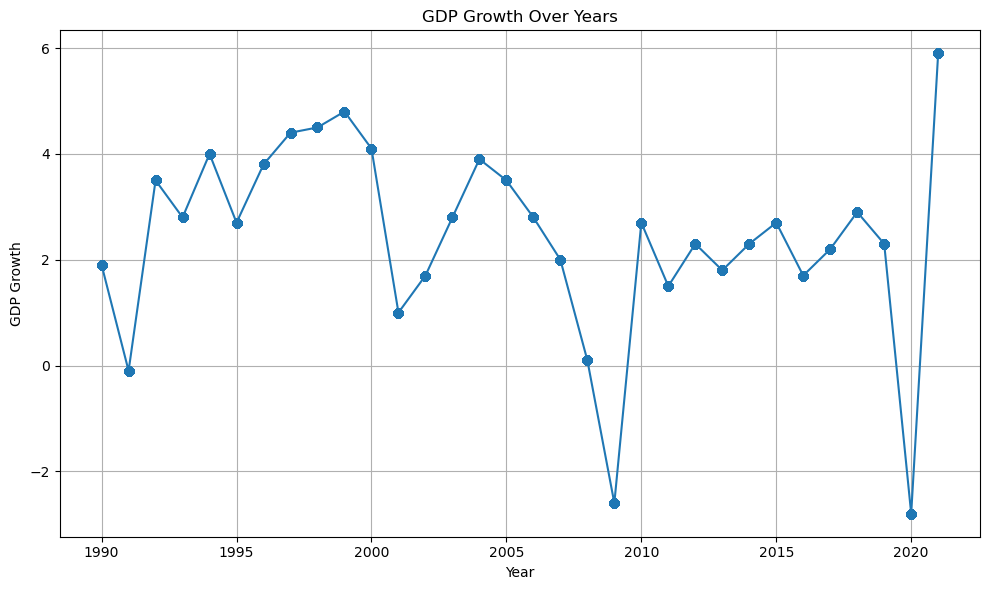

In [10]:
import matplotlib.pyplot as plt

# Plotting GDP growth over years
plt.figure(figsize=(10,6))
plt.plot(full_df['Year'], full_df['GDP growth'], marker='o', linestyle='-')
plt.title('GDP Growth Over Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.grid(True)
plt.tight_layout()
plt.show()


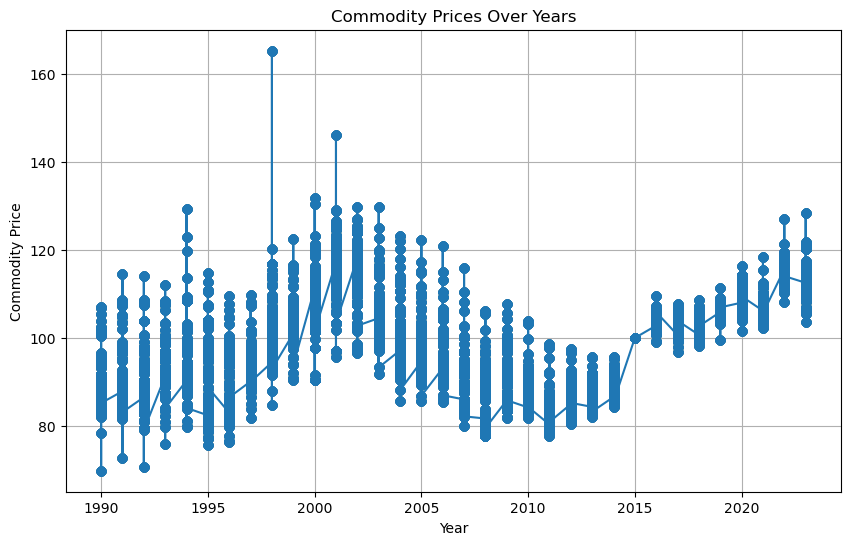

In [11]:
# Assuming 'Value' is the column for commodity prices
plt.figure(figsize=(10,6))
plt.plot(full_df['Year'], full_df['Value_x'], marker='o', linestyle='-')
plt.title('Commodity Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Commodity Price')
plt.grid(True)
plt.show()


In [46]:
commodity_df.head()

,Commodity,Weights,Year,Value
0,Bulk,U.S. competitors (country export weights),1970,83.473526
1,Consumer oriented,U.S. competitors (country export weights),1970,92.983032
2,Intermediates,U.S. competitors (country export weights),1970,92.361221
3,Beef and beef products,U.S. competitors (country export weights),1970,87.351936
4,Competitor agricultural exports to the world,U.S. competitors (country export weights),1970,80.954834


# Time Series Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# On commodity prices
test_stationarity(commodity_df['Value'])  # or any other numeric column name


ADF Statistic: -2.612803035286005
p-value: 0.09037990639604088
Critical Values: {'1%': -3.432000741590981, '5%': -2.862269407331276, '10%': -2.567158271601324}
